In [32]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import pandas as pd


In [63]:
client = InfluxDBClient('192.168.100.155',8086,'schmuddel','schmuddel','schmuddel')
query = 'SELECT mean("pressure") AS "mean_pressure", mean("flow") AS "mean_flow"  FROM "schmuddel"."autogen"."schmuddel" WHERE time > now()-45m GROUP BY time(10s) fill(none)'

<AxesSubplot:xlabel='mean_pressure', ylabel='mean_flow'>

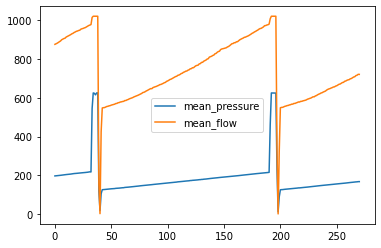

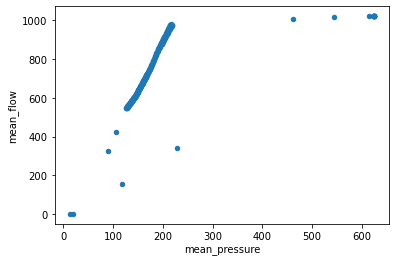

In [64]:
    res_points = list(client.query(query).get_points())
    df = pd.DataFrame(res_points)
    df.plot()
    df.plot(x="mean_pressure", y="mean_flow",kind='scatter')

In [18]:
dff =df.filter(items=[ 'time','mean_pressure', 'mean_flow'])
dff.fillna(0)

""


In [74]:
dff.dtypes

likes             object
mean_flow        float64
mean_pressure    float64
dtype: object

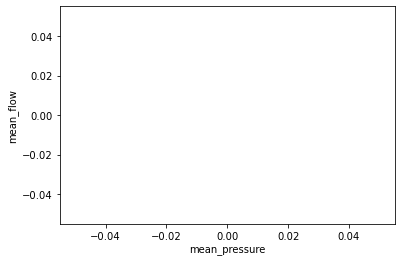

In [73]:
ax = dff.plot.scatter(x="mean_pressure", y="mean_flow",c="likes", colormap='viridis')

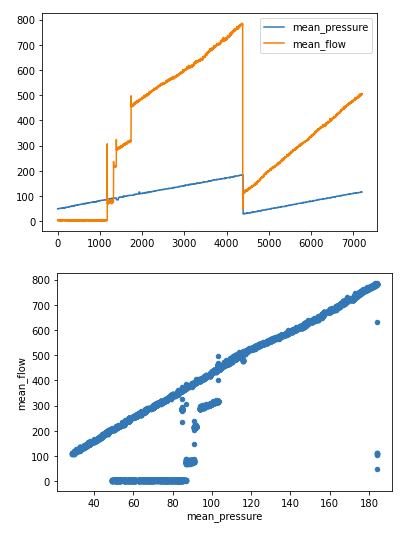
some randomness: flow is sometime rising linear with pressure